In [6]:
import pandas as pd # import pandas libary.
from sklearn.neighbors import KNeighborsRegressor # import K Neighbors Regressor.
import matplotlib.pyplot as plt
#plt.style.use('dark_background')

In [2]:
df = pd.read_excel('Source_Data.xlsx', skiprows=5) # import the source data.
df = df[df['tij'] > 0]   # remove measurement errors (t=0).
x = df[["DayOrder","Season","DayOfWeek","Period"]] # put the features together in x.
t = df[["tij"]]          # put the time alone in t.
x20 = pd.read_csv('2020x.csv') # import csv file contain the features for 2020.

print("features for years 2017,2018,2019:\n",x)
print("time for years 2017,2018,2019:\n",t)
print("features for year 2020:\n",x20)

features for years 2017,2018,2019:
      DayOrder  Season  DayOfWeek  Period
0           4       1          3       2
1          12       1          4       3
2          13       1          5       3
3          20       1          5       4
4          27       1          5       1
..        ...     ...        ...     ...
431       341       3          6       2
432       345       3          3       3
433       345       3          3       2
434       351       3          2       3
435       354       3          5       2

[431 rows x 4 columns]
time for years 2017,2018,2019:
           tij
0    18.21230
1    16.10290
2    17.91360
3    17.57760
4    17.75290
..        ...
431  14.55640
432   7.05763
433  14.98190
434   7.84330
435  13.32080

[431 rows x 1 columns]
features for year 2020:
       DayOrder  Season  DayOfWeek  Period
0            2       1          4       1
1            2       1          4       2
2            2       1          4       3
3            2       1         

# K Neighbors Regression (Forecast)

In [3]:
knnreg = KNeighborsRegressor(n_neighbors = 2, p = 1,algorithm = 'brute',
                             weights = 'distance').fit(x, t) # build the model.

t20 = pd.DataFrame(knnreg.predict(x20),columns=["tij"])
# using the model to forecast the time based on 2020 features.
y2020 = pd.concat([x20, t20], axis=1) # merge the features with its forecast.
y2020.to_csv(r'year2020_Forecast.csv', index = False) # Export the Results.

# Show the results

Mean difference: tij   -0.086747
dtype: float64
Max difference: tij    1.22425
dtype: float64
Min difference: tij   -0.694676
dtype: float64
STD difference: tij    0.687986
dtype: float64


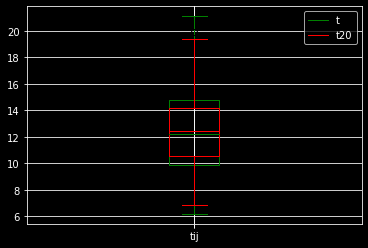

time for year 2020:
     DayOrder  Season  DayOfWeek  Period        tij
0          2       1          4       1  15.753333
1          2       1          4       2  18.375527
2          2       1          4       3  16.856300
3          2       1          4       4  14.901335
4          3       1          5       1  15.753333
5          3       1          5       2  18.375527
6          3       1          5       3  16.856300
7          3       1          5       4  14.901335
8          4       1          6       1  15.753333
9          4       1          6       2  18.375527
10         4       1          6       3  16.856300
11         4       1          6       4  14.901335
12         6       1          1       1  14.299341
13         6       1          1       2  14.386296
14         6       1          1       3  13.429794


In [7]:
# Comparison between some stats of measured time (2017,2018,2019) and forecasted time (2020)
# the Small differences indicate the forecast is good.
print("Mean difference:", pd.DataFrame.mean(t)-pd.DataFrame.mean(t20))
print("Max difference:", pd.DataFrame.max(t)-pd.DataFrame.max(t20))
print("Min difference:", pd.DataFrame.min(t)-pd.DataFrame.min(t20))
print("STD difference:", pd.DataFrame.std(t)-pd.DataFrame.std(t20))

t.boxplot(color='g') # box plot for measured time.
t20.boxplot(color='r') # box plot for forecasted time.
plt.legend(['t','t20']).legendHandles[1].set_color('r') # set legend.
plt.show() # box plot can visualize the differences.

print("time for year 2020:\n",y2020.head(15)) # year 2020 with the forecast.

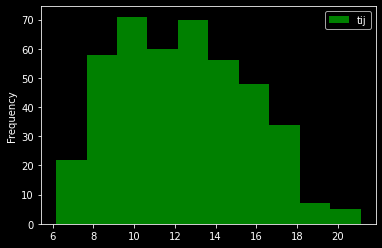

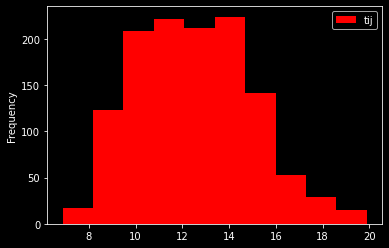

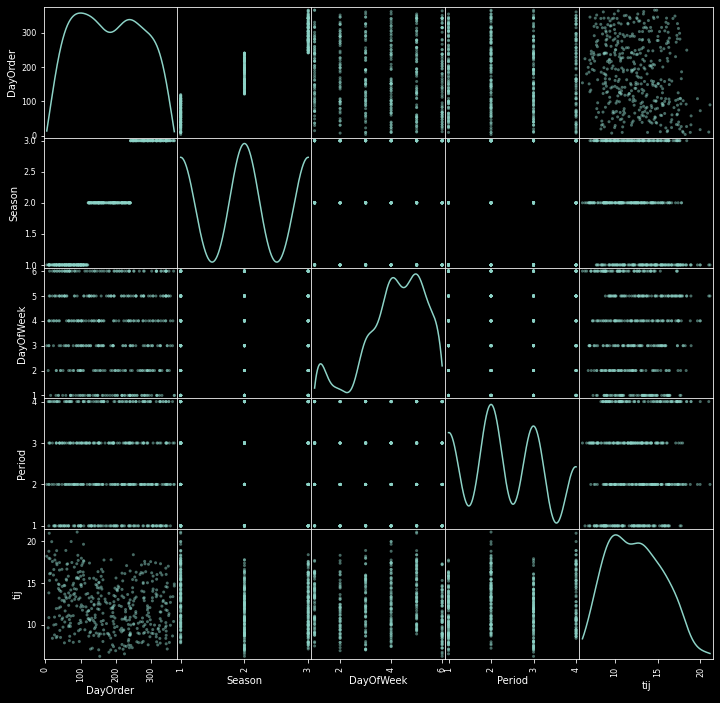

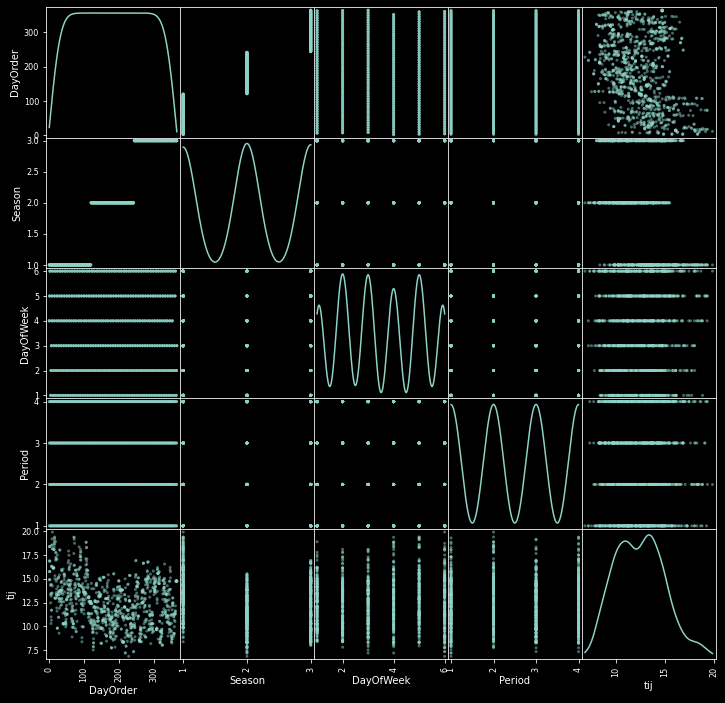

In [8]:
t.plot(kind='hist',color='g') # plot histogram
t20.plot(kind='hist',color='r') # The two histograms are similar.
pd.plotting.scatter_matrix(df, diagonal='kde', figsize=(12,12)) #last row show the relationship of time with the features.
pd.plotting.scatter_matrix(y2020, diagonal='kde', figsize=(12,12))
# the two scatter matric show how the data are similar but there are some differences.
plt.show()